# Update ArcGIS Item Contents
## Connect to ArcGIS Online (AGOL)

In [1]:
pro = False

In [2]:
if (pro):
    from arcgis import GIS
    gis = GIS('pro')

else:
    from main import *
    gis = arcgisUM.getArcGISConnection(config.ArcGIS.SECURITYINFO)

print( 'Login successful!' )
print( '  server: ' + gis.properties.name )
print( '  user: ' + gis.properties.user.username )
print( '  role: ' + gis.properties.user.role )

gis

Login successful!
  server: University of Michigan (Dev)
  user: agolcanvas
  role: org_admin


## Find a StoryMap

In [3]:
storyMapId = '3e985c1fbbeb41c1970c58a8b78262a6'

<Item title:"Jewish Paths to Urbanization" type:Web Mapping Application owner:zimchris_devumich>
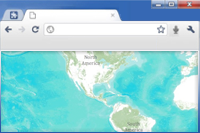

In [4]:
# item = gis.content.search(query="id:d226f46dd5d641c0abaa96e5c26e368d") # Peter's map in production
items = gis.content.search(query='id:' + storyMapId)
storyMap = items[0]
storyMap

In [5]:
storyMapData = storyMap.get_data()
if (storyMapData is None):
    raise Exception('⚠️Unable to get StoryMap data!')
    
storyMapData

{'values': {'config': {'author': {'name': ''}},
  'sections': [{'background': {'image': {'height': 496,
      'options': {'size': 'small'},
      'type': 'image',
      'url': '//www.arcgis.com/sharing/rest/content/items/d2675d083a9f4c22879e43788a45e566/resources/steps__1509468106821.png?token=vcCjrg-JEzoPeNsmQnh96SEfU3xc9zhrSvMp_gfGlua0NPo53-Z8sL5l3WBgWfNm253IpEd1HuBTpxbpxYE9mjtr8IEKuLiLwGRapqHpPW8xLRjG09dZzoPAYcfXWgPq34G3V4Lc6WevwNHwP2VJMSvFZbI6tIrKK3yzm1tHn0yqbq_JVYonLiIU0LeS08yEYZwSbs-BwoCWFKFpSad1wPt2MUrPtz2sVxN_-qg05-I.jpg',
      'width': 935},
     'type': 'image'},
    'foreground': {'options': {'titleStyle': {'background': 'light',
       'shadow': False,
       'text': 'dark'}},
     'subtitle': 'An Exploration of Jews in Odessa, Tel Aviv and New York City',
     'title': 'Jewish Paths to Urbanization'},
    'layout': 'cover-1',
    'options': {},
    'type': 'cover'},
   {'background': {'color': {'value': 'white'}, 'type': 'color'},
    'foreground': {'blocks': [{'text': {'

## Replace Some Content

In [6]:
introBefore = storyMapData['values']['sections'][1]['foreground']['blocks'][0]['text']['value']
introBefore

'<p class="block">Beginning in the 19th century Jews from all over the Pale of Settlements began coming to Odessa (2018-06-06T21:24:09.059223+00:00)</p>'

### Generate Replacement Content
Generate an ISO 8601 timestamp to be added to the "introduction" content chosen above.

In [7]:
from datetime import datetime, timezone
currentTime = datetime.now(timezone.utc)
isoTimestamp = currentTime.isoformat()
isoTimestamp

'2018-06-06T21:29:24.360917+00:00'

### Find Insertion Point
Find the place in the introduction to replace (or add) with the ISO 8601 timestamp.

In [8]:
endIndex = introBefore.find('</p>')
timestampIndex = introBefore.find(str(currentTime.year))
timestampIndex = endIndex if (timestampIndex < 0) else (timestampIndex - 2)
introAfter = introBefore[:timestampIndex] + ' (' + isoTimestamp + ')' + introBefore[endIndex:]
introAfter

'<p class="block">Beginning in the 19th century Jews from all over the Pale of Settlements began coming to Odessa (2018-06-06T21:29:24.360917+00:00)</p>'

In [9]:
storyMapData['values']['sections'][1]['foreground']['blocks'][0]['text']['value'] = introAfter

## Display New JSON

In [10]:
import json
json.dumps(storyMapData)

'{"values": {"config": {"author": {"name": ""}}, "settings": {"theme": {"colors": {"id": "black-on-white-1", "label": "Light", "themeMajor": "light", "themeContrast": "dark", "bgMain": "white", "textMain": "#4c4c4c"}}, "header": {}}, "template": {"name": "Story Map Cascade", "createdWith": "1.6.2", "editedWith": "1.6.2", "dataVersion": "1.0.0"}, "sections": [{"type": "cover", "foreground": {"title": "Jewish Paths to Urbanization", "subtitle": "An Exploration of Jews in Odessa, Tel Aviv and New York City", "options": {"titleStyle": {"shadow": false, "text": "dark", "background": "light"}}}, "options": {}, "layout": "cover-1", "background": {"type": "image", "image": {"type": "image", "url": "//www.arcgis.com/sharing/rest/content/items/d2675d083a9f4c22879e43788a45e566/resources/steps__1509468106821.png?token=vcCjrg-JEzoPeNsmQnh96SEfU3xc9zhrSvMp_gfGlua0NPo53-Z8sL5l3WBgWfNm253IpEd1HuBTpxbpxYE9mjtr8IEKuLiLwGRapqHpPW8xLRjG09dZzoPAYcfXWgPq34G3V4Lc6WevwNHwP2VJMSvFZbI6tIrKK3yzm1tHn0yqbq_JVYonLi

## Update StoryMap in AGOL
Notice the use of `StringIO` to avoid using files.

In [11]:
from io import StringIO
with StringIO(json.dumps(storyMapData)) as f:
    storyMap.update(data=f.read())

## Find Updated StoryMap

<Item title:"Jewish Paths to Urbanization" type:Web Mapping Application owner:zimchris_devumich>
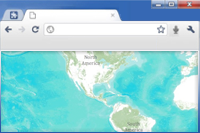

In [12]:
items = gis.content.search(query='id:' + storyMapId)
storyMap = items[0]
storyMap

In [13]:
storyMapData = storyMap.get_data()
storyMapData

{'values': {'config': {'author': {'name': ''}},
  'sections': [{'background': {'image': {'height': 496,
      'options': {'size': 'small'},
      'type': 'image',
      'url': '//www.arcgis.com/sharing/rest/content/items/d2675d083a9f4c22879e43788a45e566/resources/steps__1509468106821.png?token=vcCjrg-JEzoPeNsmQnh96SEfU3xc9zhrSvMp_gfGlua0NPo53-Z8sL5l3WBgWfNm253IpEd1HuBTpxbpxYE9mjtr8IEKuLiLwGRapqHpPW8xLRjG09dZzoPAYcfXWgPq34G3V4Lc6WevwNHwP2VJMSvFZbI6tIrKK3yzm1tHn0yqbq_JVYonLiIU0LeS08yEYZwSbs-BwoCWFKFpSad1wPt2MUrPtz2sVxN_-qg05-I.jpg',
      'width': 935},
     'type': 'image'},
    'foreground': {'options': {'titleStyle': {'background': 'light',
       'shadow': False,
       'text': 'dark'}},
     'subtitle': 'An Exploration of Jews in Odessa, Tel Aviv and New York City',
     'title': 'Jewish Paths to Urbanization'},
    'layout': 'cover-1',
    'options': {},
    'type': 'cover'},
   {'background': {'color': {'value': 'white'}, 'type': 'color'},
    'foreground': {'blocks': [{'text': {'

## Verify Update

In [14]:
if (storyMapData['values']['sections'][1]['foreground']['blocks'][0]['text']['value'] == introAfter):
    print('✅Change verified!')
else:
    print('⚠️Unable to verify change!')

✅Change verified!
